  <tr>
        <td width="15%">
        </td>
        <td>
            <div align="left">
                <font size=25px>
                    <b>  Prediction of Fradulent Transactions
                    </b>
                </font>
            </div>
        </td>
    </tr>

## **Problem Statement**:
The objective of the dataset is to predict the fraud transaction during the transaction of amount through various type of payment transactions.




## Data Definition:

Input variables:

**step** - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

**type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

**amount** - amount of the transaction in local currency.

**nameOrig** - customer who started the transaction.

**oldbalanceOrg** - initial balance before the transaction.

**newbalanceOrig** - new balance after the transaction.

**nameDest** - customer who is the recipient of the transaction.

**oldbalanceDest** - initial balance recipient before the transaction.

**newbalanceDest** - new balance recipient after the transaction.

**isFraud** - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

**isFlaggedFraud** - The business model aims to control massive transfers from one account to another and flags illegal attempts.



##**Contents**

1. **[Import Packages](#import_packages)**


2. **[Read Data](#Read_Data)**


3. **[Understand and Prepare Data](#data_preparation)**
    - 3.1 - **[Data Types and Dimensions](#Data_Understanding)**     
    - 3.2 - **[Statistical Summary]()**
    - 3.3 - **[Correlation]()**
    - 3.4 - **[Checking Duplicates]()**
    - 3.5 - **[Missing Data Treatment]()**
  
  
4. **[Visualization](#Visualization)**


5. **[Checking Outliers](#Visualization)**


6. **[Balancing the Data](#Visualization)**


7. **[Feature Selection](#feature_selection)**
    - 7.1 - **[Logistic Regression](#Logistic_Regression)**
    - 7.2 - **[Random Forest Classifier](#Random_Forest_Classifier)**
    - 7.3 - **[Decision Tree Classifier](#Decision_Tree_Classifier)** 


8. **[Model Comparision](#model_cmp)**

<a id='import_packages'></a>
## 1. Import Packages

In [ ]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc


<a id='Read_Data'></a>
## 2. Read the Data

Read the data using read_csv() function from pandas

In [ ]:
path = r"https://drive.google.com/uc?export=download&confirm=6gh6&id=1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV" 
df = pd.read_csv(path)

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


<a id='data_preparation'></a>
## 3. Understand and Prepare the Data

The process of data preparation entails cleansing, structuring and integrating data to make it ready for analysis. 

Here we will analyze and prepare data:

                        3.1. Check dimensions and data types of the dataframe 
                        3.2. Study summary statistic
                        3.3. Correlation
                        3.4. Checking Duplicates
                        3.5. Missing Data Treatment              
                
            
        


<a id='Data_Types'></a>
**3.1 Data Types and Dimensions**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


From the above output, we see that 

                        1. type,nameOrig and nameDest are in the form of object
                        2. isFraud is our class label

In [ ]:
#Getting the Shape of the Dataset
print(df.shape)

(6362620, 11)


**We see the dataframe has 11 columns and 6362620 observations**

In [ ]:
#Name of the columns present in the given Dataset
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
#Datatypes of the data present in the given Dataset
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

<a id='Statistical_Summary'></a>
**3.2 Statistical Summary**

Here we take a look at the summary of each attribute. This includes the count, mean, the min and max values as well as some percentiles for numeric variables.

In [ ]:
df.describe(include='all')


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1902386530,NaN,NaN,C1286084959,NaN,NaN,NaN,NaN
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,NaN,NaN
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00


The above output illustrates the summary statistics of all the numeric variables like the mean, median(50%), minimum, and maximum values, along with the standard deviation.

In [ ]:
# data frame with categorical features
df.describe(include='object')

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


The above output illustrates the summary statistics of the categorical variables i.e type,nameOrig and nameDest(no.of levels in the variable), top(majority level) and the count of the majority level.

<a id='Statistical_Summary'></a>
**3.3 Correlation**

Here we take a look at the Correlation of each attribute. 

Call the corr() function which will return the correlation matrix of numeric variables.

In [ ]:
# check correlation
corr=df.corr()

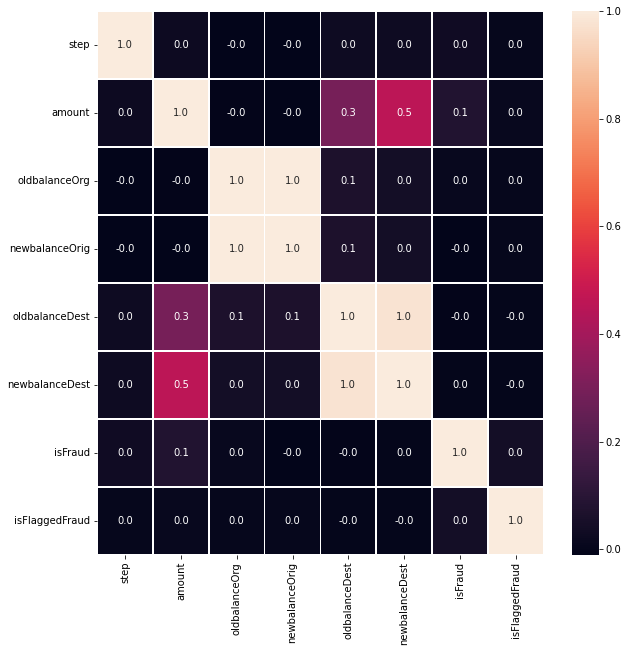

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

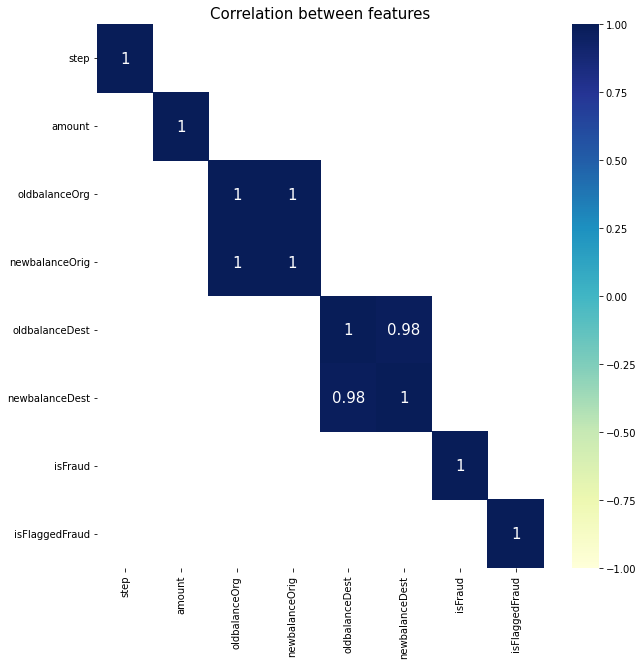

In [ ]:
# ploting correlation plot

# set the figure size
plt.figure(figsize=(10, 10))

# plotting the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# set condition to get a strong correlation between the variables
sns.heatmap(corr[(corr >= 0.9) | (corr <= -0.9)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0,
            annot=True, annot_kws={"size": 15})

# set the title
# fontsize=30: set the font size of the title
plt.title('Correlation between features', fontsize=15)
# display the plot
plt.show()

<a id='Checking Duplicates'></a>
 **3.4. Checking Duplicates**

Checking the given dataset wheather it contains Duplicated values or not.


In [ ]:
df.duplicated().sum()

0

The above output illustrates that the given dataset doesn't contain any duplicate values.

<a id='Missing_Data_Treatment'></a>
**3.5. Missing Data Treatment**

If the missing values are not handled properly we may end up drawing an inaccurate inference about the data. Due to improper handling, the result obtained will differ from the ones where the missing values are present.

In order to get the count of missing values in each column, we use the in-built function .isna().sum()

In [ ]:
# checking for missing values

df.isna().sum().sort_values(ascending=False)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

The above output illustrates that the given dataset doesn't contain any missing values.

<a id='Visualization'></a>
## 4. Visualization


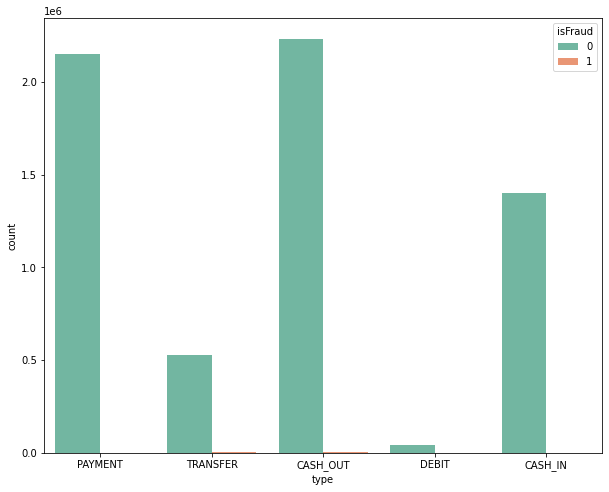

In [ ]:
# counting the number of transactions per type
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.countplot(x="type", data=df,hue="isFraud" , palette="Set2")

From the above results, we get the type of the transactions that taken place.

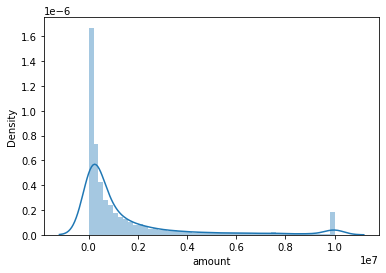

In [ ]:
#displot---- distplot represents the univariate distribution of data 
positive_case = df[df['isFraud']==1]
sns.distplot(positive_case['amount'])

From the above results, we conclude the data distribution of a variable against the density distribution.

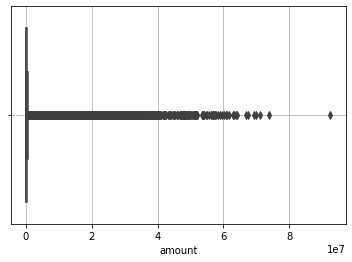

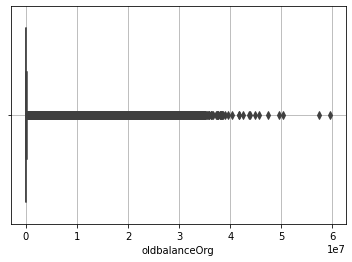

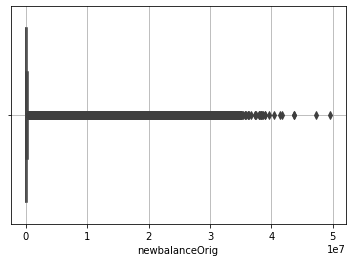

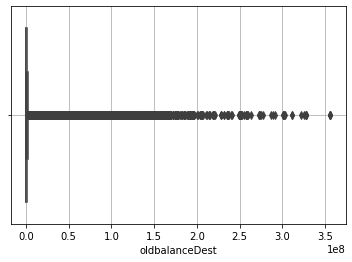

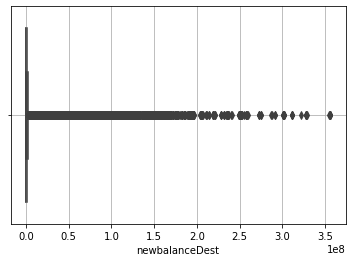

In [ ]:
#Boxplot
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
cols = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest', 'newbalanceDest']
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.grid()
    plt.show();

From the above results, we conclude the boxplots of the columns that are fed by us.

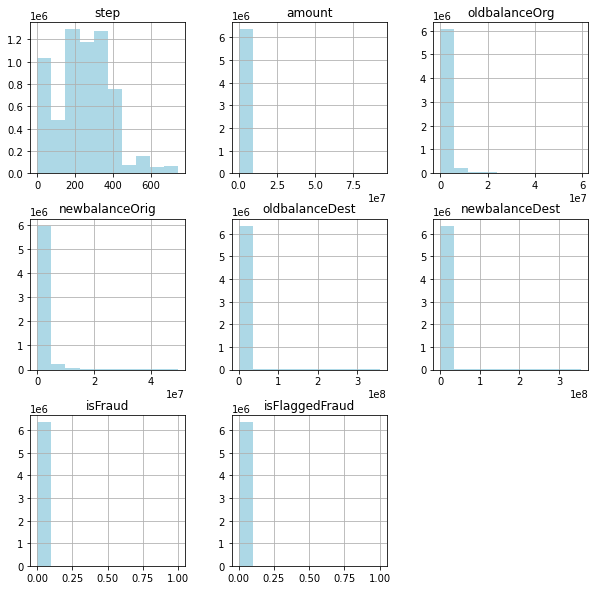

In [ ]:
#Histogram
import matplotlib.pyplot as plt
fig=df.hist(figsize=(10,10),color='lightblue')
plt.show()

From the above results, we conclude the histogram of the given dataset.

##5. Checking Outliers

In [ ]:
# getting columns
import numpy
cols=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest', 'newbalanceDest']

Here, we are getting only the required columns for checking the outliers.

In [ ]:
# IQR method (Inter Quantile Range Method)

p0=[]
p100=[]
iqr=[]

q1=[]
q2=[]
q3=[]


for i in cols:

  if type(df[i][0]) in [numpy.float64,numpy.int64] :
    
    p0.append(df[i].min())

    p100.append(df[i].max())

    x=df[i].quantile(0.25)                   # 25th quantile

    y= df[i].quantile(0.50)                    # 50th quantile

    z= df[i].quantile(0.75)                    # 75th quantile
    
    q1.append(x)
    q2.append(y)
    q3.append(z)
    
    iqr.append(z-x)                            # Inter Quantile Range
  else:
    p0.append(None)

    p100.append(None)

    iqr.append(None)

    q1.append(None)
    q2.append(None)
    q3.append(None)

For checking the outliers, we are usin g the **IQR** method.

In [ ]:
n=len(cols)
for i in range(0,n):
  print(p0[i],'\t',p100[i],'\t',iqr[i])

0.0 	 92445516.64 	 195331.9075
0.0 	 59585040.37 	 107315.175
0.0 	 49585040.37 	 144258.41
0.0 	 356015889.35 	 943036.7075
0.0 	 356179278.92 	 1111909.25


In [ ]:
lower_cutoff=[]
upper_cutoff=[]
i=0
for i in range(0,n):
  if (iqr[i]!=None) and (q1[i]!=None) and (q3[i]!=None):
    lower_cutoff.append(q1[i]- 1.5*iqr[i])
    upper_cutoff.append(q3[i]+ 1.5*iqr[i])
  else:
    lower_cutoff.append(None)
    upper_cutoff.append(None)
              

In [ ]:
print(lower_cutoff)
print(upper_cutoff)

[-279608.29125, -160972.7625, -216387.615, -1414555.06125, -1667863.875]
[501719.33875, 268287.9375, 360646.025, 2357591.76875, 2779773.125]


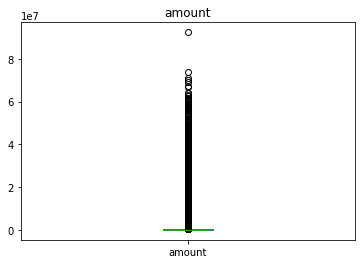

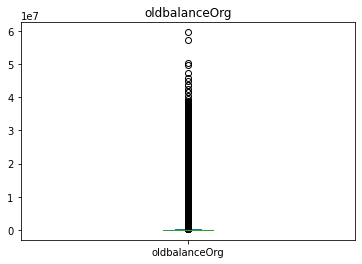

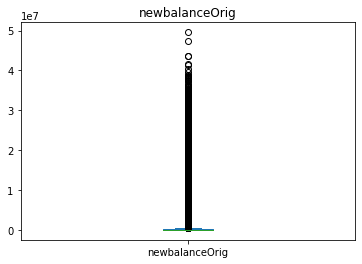

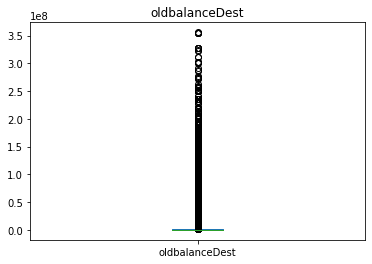

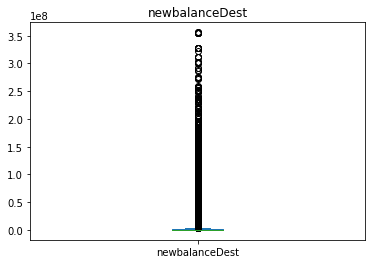

In [ ]:
# box plot for the outliers

for i in cols:
  df[i].plot(title=i,kind='box')
  plt.show()

From the above results, we conclude that the **outliers are present**in the given dataset.

But there is **no need to clip the outliers** , because if **we remove the outliers , couldn't able to the fraudulents transactions**. 

<a id="Balancing of Data"> </a>
## 6. Balancing of Data

The Balancing of the given Dataset is an important feature, Her are using the **SMOTE(Synthetic Minority Oversampling Technique)**.

In [ ]:
# dropping the nameOrig and nameDest columns as they are of no use

df.drop(["nameOrig" , "nameDest"] , inplace = True , axis =1)

Droping the unnecessary columns.

In [ ]:
# label encoding of the type feature.

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["type"] = label_encoder.fit_transform(df["type"])
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0


Here,By using Label_Encoder method, we conclude with the tranformation of the categorical values into numerical values.

SMOTE (Synthetic Minority Oversampling Technique) for balancing data

In [ ]:
 #splitting features and the target variable
# consider all the columns except 'target' using 'iloc'
# here id is not required for analysis
df_features = df.iloc[:, df.columns != 'isFraud']
# consider the target variable
df_target = df.iloc[:,df.columns == 'isFraud']

In [ ]:
# get counts of 0's and 1's in the 'target' variable using 'value_counts()'
# store the values in 'class_frequency'
class_frequency = df_target.isFraud.value_counts()
class_frequency

0    6354407
1       8213
Name: isFraud, dtype: int64

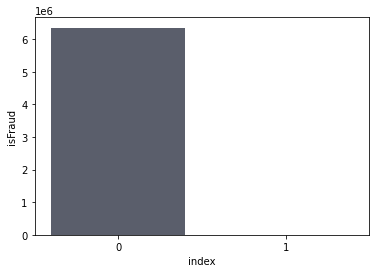

In [ ]:
xx = df['isFraud'].value_counts().reset_index()
sns.barplot(x = "index", y = "isFraud", data=xx, palette = "cividis");

The above graph describes the imbalancing of the data.

In [ ]:
from imblearn.over_sampling import SMOTE
col_names = list(df_features.columns)


X = df_features[col_names]
y = df_target['isFraud']

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)


df = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)
df.columns = col_names + ['isFraud']
df


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
0,1,3,9.839640e+03,1.701360e+05,160296.36,0.000000e+00,0.000000e+00,0,0
1,1,3,1.864280e+03,2.124900e+04,19384.72,0.000000e+00,0.000000e+00,0,0
2,1,4,1.810000e+02,1.810000e+02,0.00,0.000000e+00,0.000000e+00,0,1
3,1,1,1.810000e+02,1.810000e+02,0.00,2.118200e+04,0.000000e+00,0,1
4,1,3,1.166814e+04,4.155400e+04,29885.86,0.000000e+00,0.000000e+00,0,0
...,...,...,...,...,...,...,...,...,...
12708809,464,1,2.741621e+06,2.741621e+06,0.00,0.000000e+00,2.741621e+06,0,1
12708810,422,1,2.072173e+05,2.072173e+05,0.00,0.000000e+00,2.072173e+05,0,1
12708811,106,1,8.257871e+06,8.257871e+06,0.00,4.783167e+05,8.736188e+06,0,1
12708812,171,4,2.664230e+05,2.664230e+05,0.00,0.000000e+00,0.000000e+00,0,1


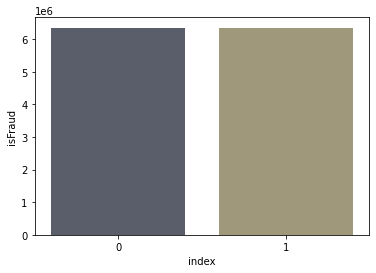

In [ ]:
xx = df['isFraud'].value_counts().reset_index()
sns.barplot(x = "index", y = "isFraud", data=xx, palette = "cividis");

From the above graph, we conclude that the proper balancing of the given dataset.

##7. Feature Selection





**7.1 LOGISTIC_REGRESSION**

In [ ]:
#Logistic Regression
#Assinging the x and y values for the dataset.
x = df.drop(['isFraud'], axis = 1)
y = df['isFraud']


In [ ]:
# Splitting the dataset into the Training set and Test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)


In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
# Fitting Logistic Regression to the Training set

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#prediction
y_pred=model.predict(x_test)

In [ ]:
#predicting the occurances of  probabilitiess for the data
model.predict_proba(x_test)

array([[0.00000000e+00, 1.00000000e+00],
       [9.99999999e-01, 6.68908208e-10],
       [0.00000000e+00, 1.00000000e+00],
       ...,
       [8.17313720e-01, 1.82686280e-01],
       [2.83395529e-12, 1.00000000e+00],
       [3.32281208e-03, 9.96677188e-01]])

In [ ]:
#to measure the accuracy of model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

0.9349742729771208

In [ ]:
#Confusion matrix
confusion_matrix(y_test,y_pred)

array([[1536990,   50928],
       [ 155672, 1433614]])

In [ ]:
#Classification Report
z=classification_report(y_test,y_pred)
print(z)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94   1587918
           1       0.97      0.90      0.93   1589286

    accuracy                           0.93   3177204
   macro avg       0.94      0.93      0.93   3177204
weighted avg       0.94      0.93      0.93   3177204



In [ ]:
#for computing Receiver operating characteristics
from sklearn.metrics import roc_curve
#for computing area under curve
from sklearn.metrics import roc_auc_score

In [ ]:
#visualizing the ROC-AUC curve
y_proba=model.predict_proba(x_test)

#we take the predicted values of class 1
y_predicted=y_proba[:,1]

#we check to see if the right values have been considered from the predicted values
print(y_predicted)

[1.00000000e+00 6.68908208e-10 1.00000000e+00 ... 1.82686280e-01
 1.00000000e+00 9.96677188e-01]


In [ ]:
#using roc_curve() to generate fpr & tpr values
fpr,tpr,thresholds=roc_curve(y_test,y_predicted)

In [ ]:
#passing the fpr&tpr values to auc()to calculate the area under curve
from sklearn.metrics import auc
roc_auc=auc(fpr,tpr)
print("Area under the curve for first model",roc_auc)

Area under the curve for first model 0.983561627623178


Text(0, 0.5, 'True Positive Rate(Sensitivity)')

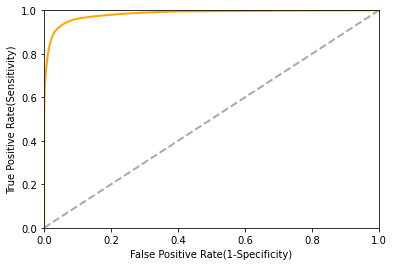

In [ ]:
#plotting the ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr,tpr,color='orange',lw=2,label='ROC curve(area under curve=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='darkgrey',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')


In [ ]:
from sklearn import metrics
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names
cols = ['Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','f1-score']

# creating an empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)

# compiling the required information
Logistic_Regression = pd.Series({'Model': "Logistic_Regression",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                  'f1-score':metrics.f1_score(y_test, y_pred)})



# appending our result table
result_tabulation = result_tabulation.append(Logistic_Regression , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic_Regression,0.934988,0.965694,0.902049,0.934974,0.932787


The above table shows the 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','f1 - score' are predicted for the Logistic_Regression.

**7.2 RANDOM_FOREST_CLASSIFIER**

In [ ]:
#RandomForestClassifier 
x = df.drop(['isFraud'], axis = 1)
y = df['isFraud']

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
#fitting random forest classification to the training set
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
#predicting the test set results
y_pred=classifier.predict(x_test)

In [ ]:
#to measure the accuracy of model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

0.9996109787095824

In [ ]:
#making confusion matrix
confusion_matrix(y_test,y_pred)

array([[1586762,    1156],
       [     80, 1589206]])

In [ ]:
#classification report
z=classification_report(y_test,y_pred)
print(z) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1587918
           1       1.00      1.00      1.00   1589286

    accuracy                           1.00   3177204
   macro avg       1.00      1.00      1.00   3177204
weighted avg       1.00      1.00      1.00   3177204



In [ ]:
#for computing Receiver operating characteristics
from sklearn.metrics import roc_curve
#for computing area under curve
from sklearn.metrics import roc_auc_score

In [ ]:
#visualizing the ROC-AUC curve
y_proba=classifier.predict_proba(x_test)

#we take the predicted values of class 1
y_predicted=y_proba[:,1]

#we check to see if the right values have been considered from the predicted values
print(y_predicted)

[1.         0.         1.         ... 0.85715168 1.         1.        ]


In [ ]:
#using roc_curve() to generate fpr & tpr values
fpr,tpr,thresholds=roc_curve(y_test,y_predicted)

In [ ]:
#passing the fpr&tpr values to auc()to calculate the area under curve
from sklearn.metrics import auc
roc_auc=auc(fpr,tpr)
print("Area under the curve for first model",roc_auc)

Area under the curve for first model 0.9999598602403974


Text(0, 0.5, 'True Positive Rate(Sensitivity)')

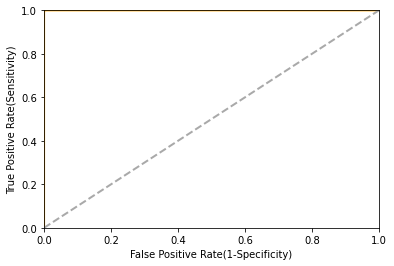

In [ ]:
#plotting the ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr,tpr,color='orange',lw=2,label='ROC curve(area under curve=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='darkgrey',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')


In [ ]:

# compiling the required information
RandomForestClassifier = pd.Series({'Model': "RandomForestClassifier",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                  'f1-score':metrics.f1_score(y_test, y_pred)})



# appending our result table
result_tabulation = result_tabulation.append(RandomForestClassifier , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic_Regression,0.934988,0.965694,0.902049,0.934974,0.932787
1,RandomForestClassifier,0.999611,0.999273,0.999950,0.999611,0.999611


The above table shows the 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score', 'f1 - score' are predicted for the Logistic_Regression and Random_Forest_Classifier.

**7.3 Decision_Tree_Classifier**

In [ ]:
#DecisionTreeClassifier
x = df.drop(['isFraud'], axis = 1)
y = df['isFraud']

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [ ]:
#Fitting
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
#prediction
y_pred=model.predict(x_test)

In [ ]:
#to measure the accuracy of model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

0.9996005922188188

In [ ]:
#Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[1586966,     952],
       [    317, 1588969]])

In [ ]:
#Classification Report
z=classification_report(y_test,y_pred)
print(z)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1587918
           1       1.00      1.00      1.00   1589286

    accuracy                           1.00   3177204
   macro avg       1.00      1.00      1.00   3177204
weighted avg       1.00      1.00      1.00   3177204



In [ ]:
#for computing Receiver operating characteristics
from sklearn.metrics import roc_curve
#for computing area under curve
from sklearn.metrics import roc_auc_score

In [ ]:
#visualizing the ROC-AUC curve
y_proba=classifier.predict_proba(x_test)

#we take the predicted values of class 1
y_predicted=y_proba[:,1]

#we check to see if the right values have been considered from the predicted values
print(y_predicted)

[1.         0.         1.         ... 0.85715168 1.         1.        ]


In [ ]:
#using roc_curve() to generate fpr & tpr values
fpr,tpr,thresholds=roc_curve(y_test,y_predicted)

In [ ]:
#passing the fpr&tpr values to auc()to calculate the area under curve
from sklearn.metrics import auc
roc_auc=auc(fpr,tpr)
print("Area under the curve for first model",roc_auc)

Area under the curve for first model 0.9999598602403974


Text(0, 0.5, 'True Positive Rate(Sensitivity)')

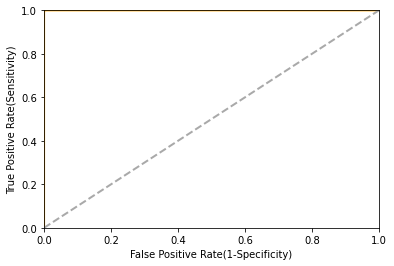

In [ ]:
#plotting the ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr,tpr,color='orange',lw=2,label='ROC curve(area under curve=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='darkgrey',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')


In [ ]:

# compiling the required information
DecisionTreeClassifier = pd.Series({'Model': "DecisionTreeClassifier",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                  'f1-score':metrics.f1_score(y_test, y_pred)})



# appending our result table
result_tabulation = result_tabulation.append(DecisionTreeClassifier , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic_Regression,0.934988,0.965694,0.902049,0.934974,0.932787
1,RandomForestClassifier,0.999611,0.999273,0.999950,0.999611,0.999611
2,DecisionTreeClassifier,0.999601,0.999401,0.999801,0.999601,0.999601


The above table shows the 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','f1 - score' are predicted for the Logistic_Regression, Random_Forest_Classifier and Decision_Tree_Classifier.

<a id="model_cmp"> </a>
## 8. Model Comparision

In [ ]:
# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic_Regression,0.934988,0.965694,0.902049,0.934974,0.932787
1,RandomForestClassifier,0.999611,0.999273,0.999950,0.999611,0.999611
2,DecisionTreeClassifier,0.999601,0.999401,0.999801,0.999601,0.999601


From the above results table, we conclude that **the accuracy score for the given dataset is more ,when using RandomForestClassifier and DecisionTreeClasifier** classification models.